# Data Analysing Pens and Printers

# 1. Data validation:
Describe validation and cleaning steps for every column in the data

`week` Week sale was made, counted as weeks since product launch

`sales_method` Character, which of the three sales methods were used for that customer

`customer_id` Character, unique identifier for the customer

`nb_sold` Numeric, number of new products sold

`revenue` Numeric, revenue from the sales, rounded to 2 decimal places.

`years_as_customer` Numeric, number of years customer has been buying from us (company founded in 1984)

`nb_site_visits` Numeric, number of times the customer has visited our website in the last 6 months

`state` Character, location of the customer i.e. where orders are shipped


In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import matplotlib.ticker as mticker
from scipy import stats

sns.set(style="whitegrid")
sns.set_theme(style="whitegrid")
sns.color_palette("Set3")

# Read csv file into a pandas dataframe
df_product_sales_copy = pd.read_csv('product_sales.csv')

# a. State whether the values match the description given in the table above.
df_sales = df_product_sales_copy.copy()
# First step is to check and understand the data.
df_sales = df_sales[['customer_id', 'week', 'state', 'revenue', 'nb_site_visits', 'nb_sold', 'sales_method', 'years_as_customer']]

print(df_sales.info())
print(df_sales.describe())
#print(df_sales.isna().sum())
df_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        15000 non-null  object 
 1   week               15000 non-null  int64  
 2   state              15000 non-null  object 
 3   revenue            13926 non-null  float64
 4   nb_site_visits     15000 non-null  int64  
 5   nb_sold            15000 non-null  int64  
 6   sales_method       15000 non-null  object 
 7   years_as_customer  15000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None
               week       revenue  ...       nb_sold  years_as_customer
count  15000.000000  13926.000000  ...  15000.000000       15000.000000
mean       3.098267     93.934943  ...     10.084667           4.965933
std        1.656420     47.435312  ...      1.812213           5.044952
min        1.000000     32.540000  ...      7.000000   

,customer_id,week,state,revenue,nb_site_visits,nb_sold,sales_method,years_as_customer
0,2e72d641-95ac-497b-bbf8-4861764a7097,2,Arizona,NaN,24,10,Email,0
1,3998a98d-70f5-44f7-942e-789bb8ad2fe7,6,Kansas,225.47,28,15,Email + Call,1
2,d1de9884-8059-4065-b10f-86eef57e4a44,5,Wisconsin,52.55,26,11,Call,6
3,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,4,Indiana,NaN,25,11,Email,3
4,10e6d446-10a5-42e5-8210-1b5438f70922,3,Illinois,90.49,28,9,Email,0


## 1.1 Validation and Cleaning steps

**Analyzing Sales Methods:**
I counted the occurrences of different sales methods, standardized their labels, and changed the data type to categorical.

**Group and Calculate Grouped Means for Revenue:**
I organized the data by sales method and customer state, computed the average revenue for each group, rounded it to two decimal places, and used these averages to fill missing revenue values.

**Convert 'state' Column to Categorical:**
I converted the 'state' column to a categorical data type for more efficient storage and analysis.

**Convert 'customer_id' Column to String:**
I changed the data type of the 'customer_id' column to string format to maintain its integrity.

In [2]:
# Data Validation and Cleaning

# Analyzing Sales Methods
sales_method_counts = df_sales['sales_method'].value_counts()
#print(sales_method_counts)

df_sales['sales_method'] = df_sales['sales_method'].replace({'email': 'Email', 'em + call': 'Email + Call'}).astype('category')

# Group by relevant columns and calculate the mean of 'revenue' for each group
grouped_means = df_sales.groupby(['sales_method', 'state'])['revenue'].transform('mean').round(2)

# Fill missing 'revenue' values using the calculated group means
df_sales['revenue'].fillna(grouped_means, inplace=True)
#df_sales['revenue'].fillna(0, inplace=True)
df_sales['state'] = df_sales['state'].astype('category')

df_sales['customer_id'] = df_sales['customer_id'].astype(str)

# Analyzing Sales Methods
sales_method_counts = df_sales['sales_method'].value_counts()
#print(sales_method_counts)

revenue_by_method = df_sales.groupby('sales_method')['revenue'].sum()
#print(revenue_by_method)

print(df_sales.info())

df_sales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customer_id        15000 non-null  object  
 1   week               15000 non-null  int64   
 2   state              15000 non-null  category
 3   revenue            15000 non-null  float64 
 4   nb_site_visits     15000 non-null  int64   
 5   nb_sold            15000 non-null  int64   
 6   sales_method       15000 non-null  category
 7   years_as_customer  15000 non-null  int64   
dtypes: category(2), float64(1), int64(4), object(1)
memory usage: 735.1+ KB
None


,customer_id,week,state,revenue,nb_site_visits,nb_sold,sales_method,years_as_customer
0,2e72d641-95ac-497b-bbf8-4861764a7097,2,Arizona,96.88,24,10,Email,0
1,3998a98d-70f5-44f7-942e-789bb8ad2fe7,6,Kansas,225.47,28,15,Email + Call,1
2,d1de9884-8059-4065-b10f-86eef57e4a44,5,Wisconsin,52.55,26,11,Call,6
3,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,4,Indiana,96.58,25,11,Email,3
4,10e6d446-10a5-42e5-8210-1b5438f70922,3,Illinois,90.49,28,9,Email,0
...,...,...,...,...,...,...,...,...
14995,17267b41-d048-4346-8b90-7f787690a836,4,Pennsylvania,50.82,22,10,Call,0
14996,09e10d6f-4508-4b27-895e-4db11ce8302b,5,Kansas,52.33,27,10,Call,1
14997,839653cb-68c9-48cb-a097-0a5a3b2b298b,1,West Virginia,34.87,22,7,Call,4
14998,e4dad70a-b23b-407c-8bd3-e32ea00fae17,6,New Jersey,64.90,27,13,Call,2


# 2. Exploratory Analysis:
Include two different graphics showing single variables only to demonstrate the characteristics of data
Include at least one graphic showing two or more variables to represent the relationship between features
Describe your findings

## 2.1 How many customers were there for each approach?
Pens and Printers introduced a new line of office stationery, targeting customers interested in creative and brainstorming tools.
Three sales approaches were tested:

**Email:** 
Customers in this group received an initial product launch email and a follow-up email three weeks later. This approach required minimal team effort.

**Call:** 
Customers in this group received phone calls from the sales team, with each call lasting around thirty minutes per customer.

**Email and Call:** 
Customers in this group received an initial product information email, followed by a call from the sales team a week later, which lasted approximately ten minutes per customer.

The distribution of customers across these approaches was not mentioned in the context, but it's essential to determine the customer engagement with each approach.

These visualizations provide a comprehensive overview of the dataset, highlighting sales methods, revenue distribution, state-wise contributions, revenue trends over weeks, and the average sales volume.

**Graph 1-1:** This histogram depicts the distribution of revenue values across different ranges. The data has a mean revenue of approximately 96.

**Graph 1-2:** This histogram illustrates the distribution of the number of items sold. The data shows a mean of around 10 items sold.

**Graph 1-3:** This histogram visualizes the distribution of the number of site visits. The distribution has a mean of approximately 25 visits.

**Graph 1-4:** This histogram displays the distribution of the number of years as a customer. The data reveals a mean of about 5 years.

**Graph 1-5:** This bar plot presents the total revenue generated from each state. Notably, California, Texas, and New York contribute significantly more revenue compared to other states, highlighting their importance to the overall revenue.

**Graph 1-6:** This bar plot shows the total number of items sold in each state. It aligns with the revenue distribution, indicating that states with higher revenue also have more items sold.

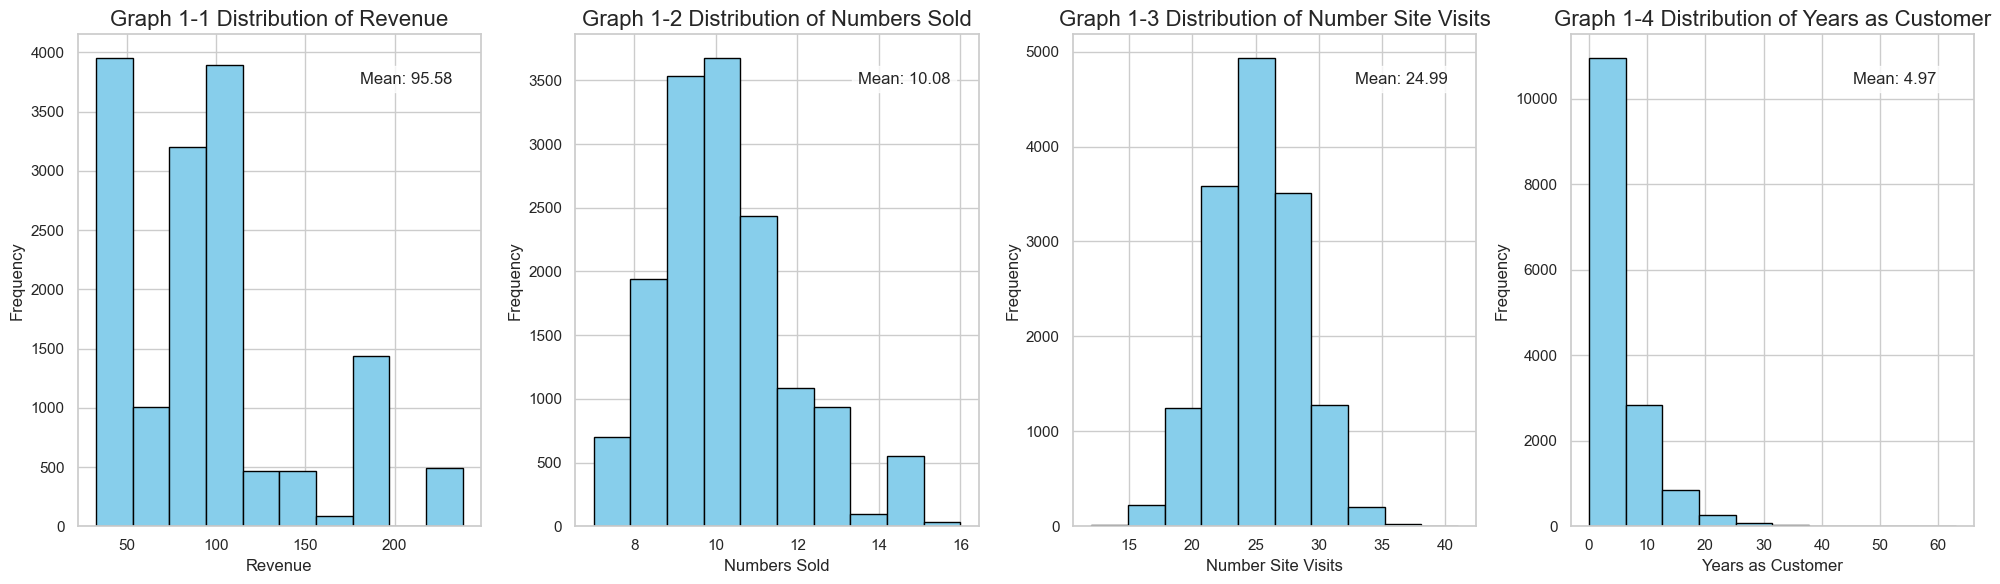

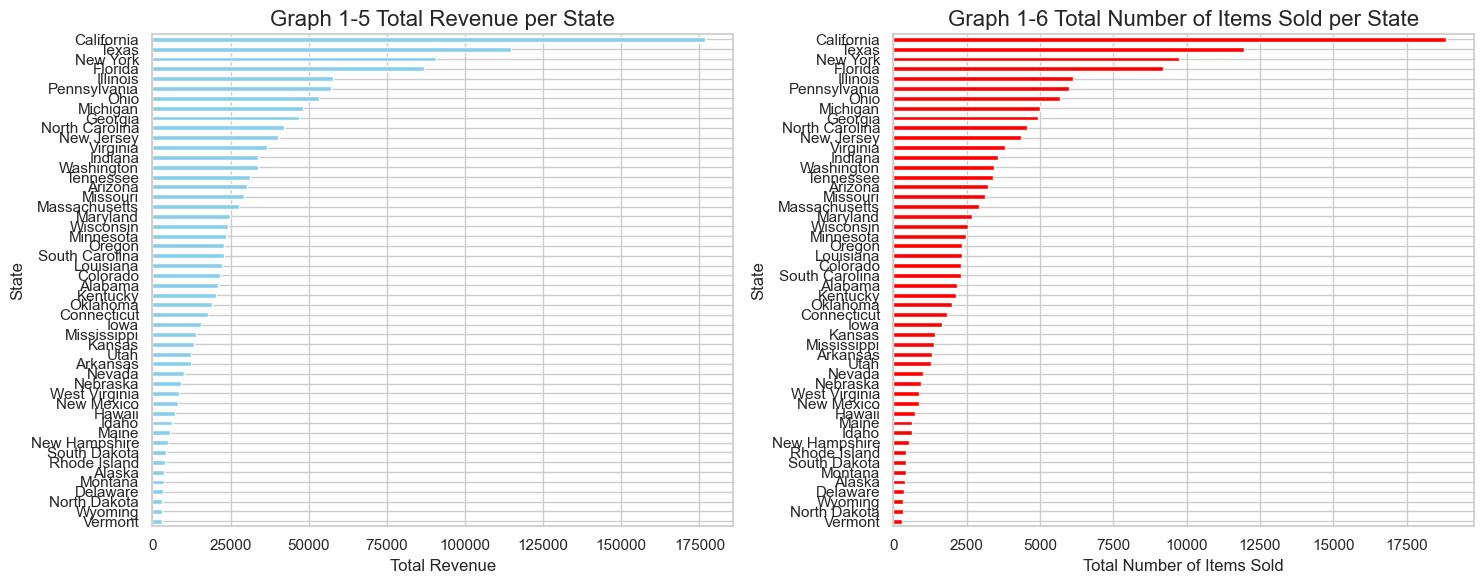

In [3]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Distribution of Revenue
revenue_data = df_sales['revenue']
axes[0].hist(revenue_data, bins=10, color='skyblue', edgecolor='black')
mean_revenue = np.mean(revenue_data)
axes[0].text(0.7, 0.9, f"Mean: {mean_revenue:.2f}", transform=axes[0].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
axes[0].set_title('Graph 1-1 Distribution of Revenue', size=16)
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Frequency')

# Distribution of nb_sold
nb_sold_data = df_sales['nb_sold']
axes[1].hist(nb_sold_data, bins=10, color='skyblue', edgecolor='black')
mean_nb_sold = np.mean(nb_sold_data)
axes[1].text(0.7, 0.9, f"Mean: {mean_nb_sold:.2f}", transform=axes[1].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
axes[1].set_title('Graph 1-2 Distribution of Numbers Sold', size=16)
axes[1].set_xlabel('Numbers Sold')
axes[1].set_ylabel('Frequency')

# Distribution of nb_site_visits
nb_site_visits_data = df_sales['nb_site_visits']
axes[2].hist(nb_site_visits_data, bins=10, color='skyblue', edgecolor='black')
mean_nb_site_visits = np.mean(nb_site_visits_data)
axes[2].text(0.7, 0.9, f"Mean: {mean_nb_site_visits:.2f}", transform=axes[2].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
axes[2].set_title('Graph 1-3 Distribution of Number Site Visits', size=16)
axes[2].set_xlabel('Number Site Visits')
axes[2].set_ylabel('Frequency')

# Distribution of years_as_customer
years_as_customer_data = df_sales['years_as_customer']
axes[3].hist(years_as_customer_data, bins=10, color='skyblue', edgecolor='black')
mean_years_as_customer = np.mean(years_as_customer_data)
axes[3].text(0.7, 0.9, f"Mean: {mean_years_as_customer:.2f}", transform=axes[3].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
axes[3].set_title('Graph 1-4 Distribution of Years as Customer', size=16)
axes[3].set_xlabel('Years as Customer')
axes[3].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

# Total Revenue and Number of Items Sold per State
plt.figure(figsize=(15, 6))
# Plot 3: Total Revenue per State (Bar Plot)
plt.subplot(1, 2, 1)
state_stats = df_sales.groupby('state').agg({'revenue': 'sum'}).sort_values(by='revenue', ascending=True)
state_stats['revenue'].plot(kind='barh', color='skyblue')
plt.title('Graph 1-5 Total Revenue per State', size=16)
plt.xlabel('Total Revenue')
plt.ylabel('State')
plt.tight_layout()

# Plot 4: Total Number of Items Sold per State (Bar Plot)
plt.subplot(1, 2, 2)
avg_nb_sold_in_week = df_sales.groupby('state').agg({'nb_sold': 'sum'}).sort_values(by='nb_sold', ascending=True)
avg_nb_sold_in_week['nb_sold'].plot(kind='barh', color='red')
plt.title('Graph 1-6 Total Number of Items Sold per State', size=16)
plt.xlabel('Total Number of Items Sold')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## 2.2 What does the spread of the revenue look like overall? And for each method?

The analysis provided insights into the revenue spread for each sales method. Overall, the revenue distribution appeared to have a mean around 96.
**Detailed revenue spreads for each method were mentioned:**

**Email + Call:** This method showed the widest revenue spread, ranging from about 150 to 200.

**Email:** The revenue spread for this method ranged from 80 to 130.

**Call:** The revenue spread for this method ranged from 25 to 75.

These insights can help in understanding which method generated higher revenue and its variability.

**Graph 1-7:** This pie chart represents the revenue distribution among different sales methods. It indicates that Email accounts for approximately 50% of revenue, while Email + Call and Call contribute 33% and 17%, respectively, demonstrating that Email is the most frequently used method.

**Graph 1-8:** This box plot illustrates the spread of revenue for each sales method. It reveals that Email + Call has the widest revenue spread, ranging between 150 and 200, suggesting variability in its revenue generation.

**Graph 1-9:** This bar plot presents the distribution of various sales methods employed, revealing the number of customers who engaged with each approach. Notably, 'Email' recorded the highest interactions, with approximately 7500 customers, followed by 'Call' with 5000, and 'Email + Call' with 2600.

**Graph 1-10**: This bar plot offers insights into the average revenue generated by different sales methods. Among them, 'Email + Call' stands out with the highest average revenue, approximately 185, followed by 'Email' with 100 and 'Call' with 50.

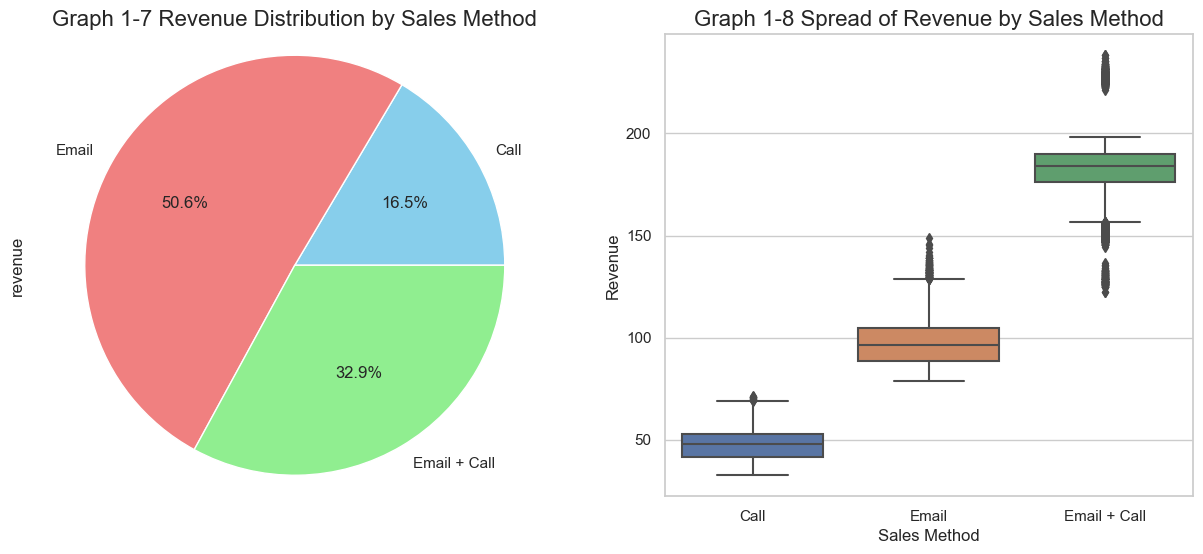

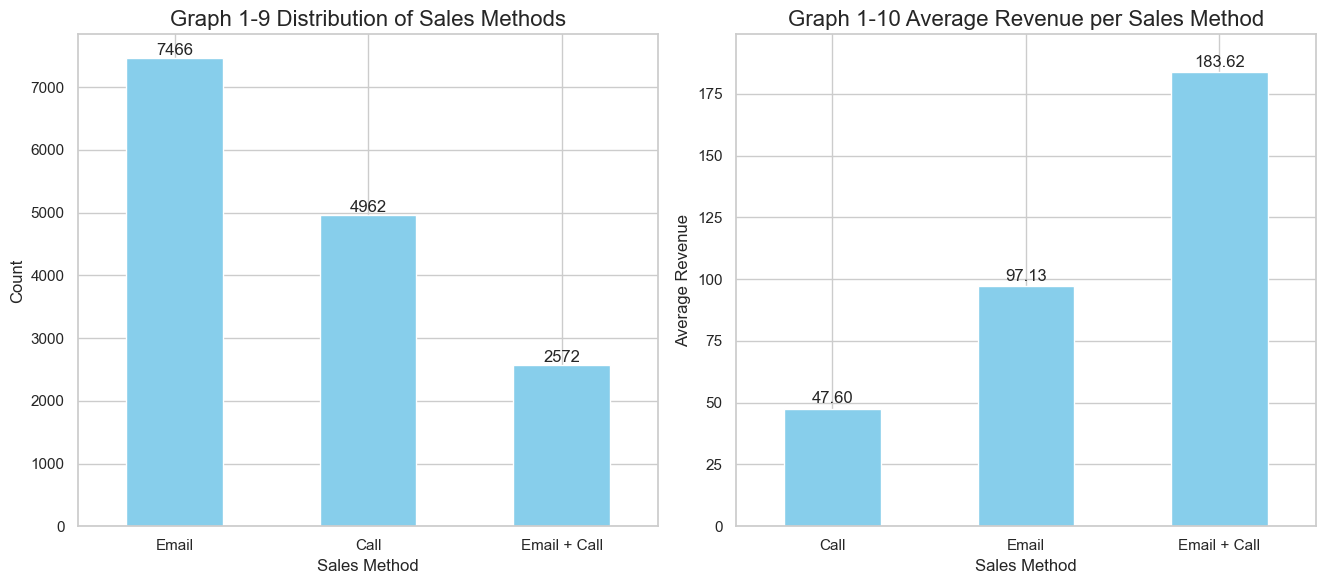

In [4]:
# Plot 2: Revenue Distribution by Sales Method
plt.figure(figsize=(15, 6))
# Plot 2.1: Revenue Distribution by Sales Method (Pie Chart)
plt.subplot(1, 2, 1)
revenue_by_method = df_sales.groupby('sales_method')['revenue'].sum()
revenue_by_method.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Graph 1-7 Revenue Distribution by Sales Method', size=16)
plt.axis('equal')
# Plot 2.2: Spread of Revenue by Sales Method (Box Plot)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_sales, x='sales_method', y='revenue')
plt.title('Graph 1-8 Spread of Revenue by Sales Method', size=16)
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

# Plot 1: Distribution of Sales Methods
plt.figure(figsize=(20, 6))

# Plot 1.1: Distribution of Sales Methods (Bar Plot)
plt.subplot(1, 3, 1)
sales_method_counts = df_sales['sales_method'].value_counts()
ax1 = sales_method_counts.plot(kind='bar', color='skyblue')
plt.title('Graph 1-9 Distribution of Sales Methods', size=16)
plt.xlabel('Sales Method')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Add numbers on top of bars
for i, v in enumerate(sales_method_counts):
    ax1.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Plot 1.2: Average Revenue per Method (Bar Plot)
plt.subplot(1, 3, 2)
avg_revenue_per_method = df_sales.groupby('sales_method')['revenue'].mean()
avg_revenue_per_method.plot(kind='bar', color='skyblue')
plt.title('Graph 1-10 Average Revenue per Sales Method', size=16)
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.ylim(0, 199)

# Add numbers on top of bars
ax2 = plt.gca()
for i, v in enumerate(avg_revenue_per_method):
    ax2.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom')

# Display the plots
plt.tight_layout()
plt.show()

## 2.3 Was there any difference in revenue over time for each of the methods?

The analysis considered revenue trends over time for each method.

**Email + Call:** This method demonstrated a peak in revenue between 15 and 25 years, which requires further investigation to understand the reasons.

**Email:** This method appeared to have a more consistent revenue pattern over time.

**Call:** There was a slight peak in revenue around 20 years for this method.
These trends highlight potential differences in revenue generation over time, which should be explored further to optimize strategies.

**Graph 1-11:** This line plot showcases revenue trends over time for each method. It indicates that 'Email + Call' experiences a peak in revenue between 15 and 25 years, which may warrant further investigation. In contrast, 'Email' demonstrates a more consistent trend, while 'Call' experiences a slight peak around 20 years. This suggests that 'Email + Call' combined may be the optimal choice based on this data.

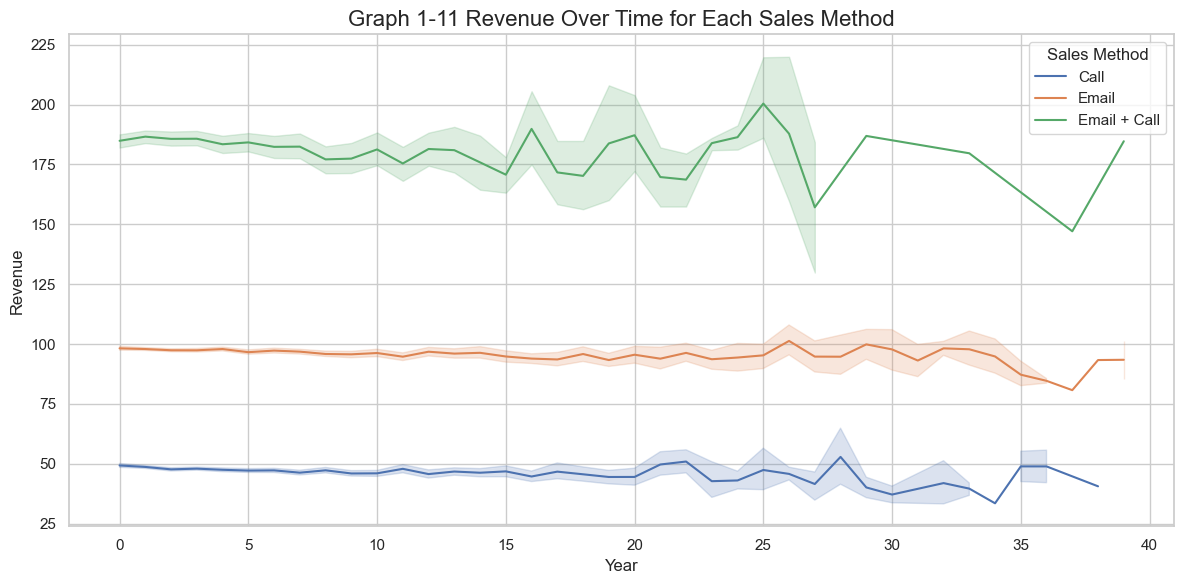

In [5]:
# Calculate the IQR and determine the upper and lower limits
Q1 = df_sales['years_as_customer'].quantile(0.025)
Q3 = df_sales['years_as_customer'].quantile(0.975)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
# Filter out the outliers based on the upper and lower limits
df_filtered = df_sales.loc[(df_sales['years_as_customer'] >= lower) & (df_sales['years_as_customer'] <= upper)]
# Compute the number of data points after removing outliers
n_data = len(df_filtered)
# Determine the number of bins based on the square root of the number of data points
n_bins = int(np.sqrt(n_data)) - 5

# Revenue Over Time for Each Sales Method - Without Outliers
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='years_as_customer', y='revenue', hue='sales_method')
plt.title('Graph 1-11 Revenue Over Time for Each Sales Method', size=16)
plt.xlabel('Year')
plt.ylabel('Revenue')
#plt.xlim(0, 40)
plt.legend(title='Sales Method')

plt.tight_layout()
plt.show()

## 2.4 Exploratory Analysis Summary 

**Revenue Distribution:** The distribution of revenue centers around 96, and the spread appears relatively balanced.

**Items Sold:** The number of items sold has a mean of around 10, indicating moderate sales.

**Site Visits:** The number of site visits averages around 25, suggesting a good level of engagement.

**Years as Customer**: On average, customers have been with the business for about 5 years.

**State Contributions:** California, Texas, and New York significantly contribute to revenue, as indicated by high bar heights.

**Items Sold by State:** States with high revenue also have high sales volume.

**Sales Method Distribution:** 'Email' is the most frequently used method, followed by 'Email + Call' and 'Call'.

**Revenue Spread by Method:** 'Email + Call' has the widest revenue spread, spanning approximately 150 to 200.

**Years as Customer by Method:** Customer tenure is evenly distributed among different sales methods. 'Email + Call' has a revenue peak between 15 and 25 years, suggesting it deserves further analysis. 'Email' demonstrates consistent revenue, while 'Call' peaks around 20 years.

**In summary**, the data indicates that 'Email + Call' might be the preferred method, given its revenue performance, but further analysis is needed to make informed decisions about sales approaches.

# 3. Definition of a metric for the business to monitor
How should the business use the metric to monitor the business problem?
Can you estimate initial value(s) for the metric based on the current data?

In [6]:
'''# Select the relevant columns from the DataFrame
selected_data = df_sales[['nb_site_visits', 'nb_sold', 'sales_method', 'years_as_customer', 'revenue']]

# Create a pair plot
sns.set(style='ticks')
sns.pairplot(selected_data, hue='sales_method', markers=["o", "s", "D"])

# Customize the pair plot
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()
'''

'# Select the relevant columns from the DataFrame\nselected_data = df_sales[[\'nb_site_visits\', \'nb_sold\', \'sales_method\', \'years_as_customer\', \'revenue\']]\n\n# Create a pair plot\nsns.set(style=\'ticks\')\nsns.pairplot(selected_data, hue=\'sales_method\', markers=["o", "s", "D"])\n\n# Customize the pair plot\nplt.suptitle(\'Pair Plot of Variables\', y=1.02)\nplt.show()\n'

## 3.1 How should the business use the metric to monitor the business problem?

The metric of interest, in this case, is the "Revenue per Hour" generated by different sales methods ('Email,' 'Email + Call,' and 'Call'). To effectively use this metric to monitor the business problem, Pens and Printers should consider the following steps:

**Ongoing Monitoring:** Continuously track and monitor the "Revenue per Hour" metric for each sales method. This can be done in real-time or through regular reporting intervals.

**Establishing Benchmarks:** Set initial benchmarks based on the current data. These benchmarks can serve as reference points for evaluating the performance of each sales method over time.

**A/B Testing**: Conduct A/B testing with variations in sales strategies and approaches to optimize the revenue per hour further. Experiment with different content, timing, and frequency of emails and calls to determine the most effective combination.

**Comparative Analysis:** Regularly compare the "Revenue per Hour" across different sales methods to identify trends, patterns, and variations. Look for any significant deviations from the established benchmarks.

**Customer Feedback:** Solicit feedback from customers who have engaged with each sales method. Understand their preferences, pain points, and reasons for choosing a particular approach. Use this feedback to refine strategies.

**Resource Allocation:** Allocate resources, such as sales team members' time and marketing budgets, based on the performance of each method. Focus more resources on the methods that demonstrate higher revenue per hour.

**Adaptation:** Be prepared to adapt and evolve sales methods based on changing customer behaviors, market dynamics, and emerging trends. Flexibility is key to maintaining and improving revenue per hour.

**Performance Metrics:** Consider additional performance metrics such as conversion rates, customer acquisition costs, and customer retention rates to gain a holistic view of the effectiveness of each sales method.

## 3.2 Can you estimate initial value(s) for the metric based on the current data?

There is a statistically significant difference in revenue per hour among the three groups (Email, Email + Call, Call).
In practical terms, this means that the revenue per hour for at least one of the groups is significantly different from the others, and this difference is highly unlikely to be due to random variation.

The one-way ANOVA test indicates that there are significant differences in revenue generation among the "Email," "Email + Call," and "Call" methods. 

### 3.2.1 Estimating Initial Values:
Based on the Graph 2-1, we have estimated the initial values for "Revenue per Hour" for each sales method:

**'Email':** 0.078016$ per hour

**'Call':** 0.006346$ per hour

**'Email + Call':** 0.048967$ per hour

These initial values provide a starting point for Pens and Printers to assess the performance of each sales method. However, it's essential to emphasize that these values may change over time as strategies are refined and customer preferences evolve.

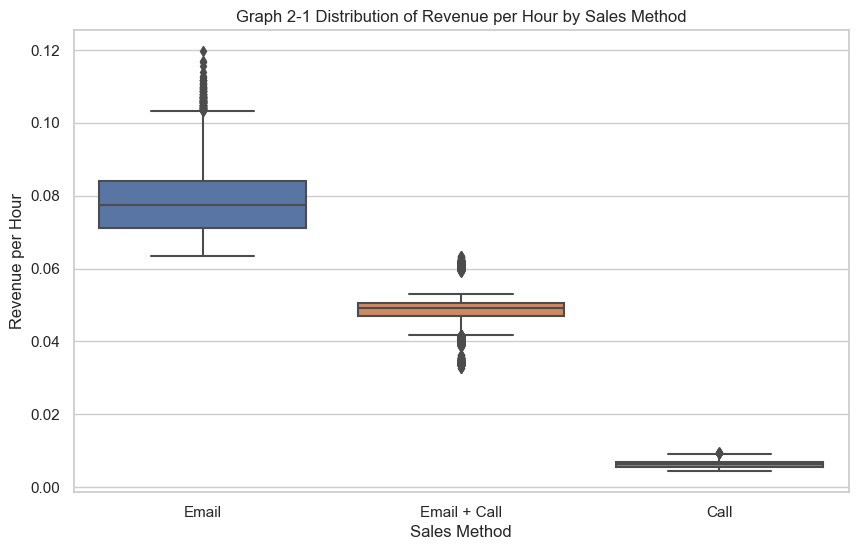

In [7]:
# Convert the 'sales_method' column to strings
df_sales['sales_method'] = df_sales['sales_method'].astype(str)

# Calculate the revenue per hour for each sales method
# Assumption: Total revenue is rounded to 2 decimal places
df_sales['revenue_per_hour'] = df_sales['revenue'] / (
    df_sales['sales_method'].map({
        'Email': 0.083,  # 5 minutes
        'Call': 0.5,     # 30 minutes
        'Email + Call': 0.083 + 0.167,  # 5 minutes for email + 10 minutes for call
    }) * len(df_sales))  # Total hours for each method

# Group and calculate the average revenue per hour for each sales method
average_revenue_per_hour = df_sales.groupby('sales_method')['revenue_per_hour'].mean()

# Print the results
#print("Average Revenue per Hour by Sales Method:")
#print(average_revenue_per_hour)

# Separate the data for the three A/B test groups
group_email = df_sales[df_sales['sales_method'] == 'Email']['revenue_per_hour']
group_email_call = df_sales[df_sales['sales_method'] == 'Email + Call']['revenue_per_hour']
group_call = df_sales[df_sales['sales_method'] == 'Call']['revenue_per_hour']
    

# Create a box plot to visualize revenue per hour by sales method
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_method', y='revenue_per_hour', data=df_sales)
plt.title('Graph 2-1 Distribution of Revenue per Hour by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue per Hour')
#plt.ylim(0.00175, 0.125, 0.001)

# Show the plot
plt.show()

### 3.2.2 Estimating Initial Values:
Based on the Graph 2-2.
This visual aids in assessing the effectiveness of different sales strategies in generating revenue per hour.

**'Email'** reached 7466 customers and generated 0.078 resulting in a total revenue per hour of 582.47$.

**'Email + Call'** targeted 2572 customers yielding 0.048 per hour leading to a total revenue of 125.94$ in a hour.

**'Call'** engaged 4962 customers and produced 0.006 totaling 31.49$ in revenue in a hour.

The bar plot highlighting 'Email' as the highest revenue generator, followed by **'Email + Call' and 'Call.'** 

Continuous monitoring, experimentation, and adaptation will be crucial in maintaining and improving these initial values for **"Revenue per Hour."**

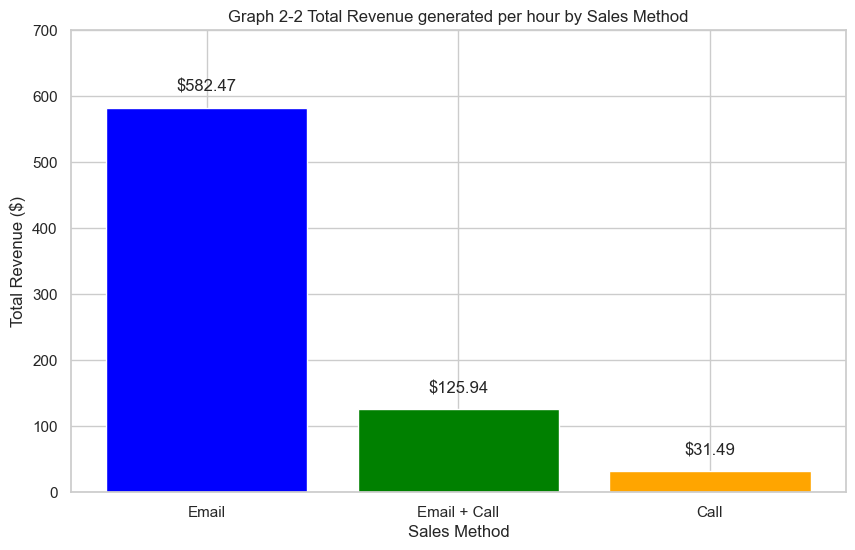

In [8]:
# Counts of each sales method
counts = {
    'Email': 7466,
    'Call': 4962,
    'Email + Call': 2572
}

# Average revenue per hour for each method
average_revenue_per_hour = {
    'Email': 0.07816,
    'Call': 0.006346,
    'Email + Call': 0.048967
}

# Calculate total revenue for each method
total_revenue = {method: count * average_revenue_per_hour[method] for method, count in counts.items()}

# Print the total revenue for each method
#for method, revenue in total_revenue.items():
    #print(f"Total Revenue for {method}: ${revenue:.2f}")
    
# Total revenue data
methods = ["Email", "Email + Call", "Call"]
total_revenue = [582.47, 125.94, 31.49]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(methods, total_revenue, color=['blue', 'green', 'orange'])
plt.title('Graph 2-2 Total Revenue generated per hour by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Total Revenue ($)')
plt.ylim(0, 700)  # Set the y-axis limit for better visualization

# Add labels to the bars
for i, revenue in enumerate(total_revenue):
    plt.text(i, revenue + 20, f"${revenue:.2f}", ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

## 3.3 The one-way ANOVA test:
The one-way ANOVA test indicates that there are significant differences in revenue generation among the "Email," "Email + Call," and "Call" methods. 

**ANOVA for Average Revenue per Hour:**
Measures variation between means of three groups relative to within-group variation. A very high F-statistic (163601.73) indicates substantial differences in means of revenue per hour among the three groups.
P-value: Represents the probability of observing such differences by random chance alone. A tiny p-value (0.0) means the observed difference is extremely unlikely by random chance.

**ANOVA for Revenue:**
Signifies significant revenue differences among sales methods.
P-value: Strongly suggests statistically significant revenue variations due to sales method choice.

**ANOVA for Site Visits:**
Measures variation between sales methods' site visits.
P-value: Highly significant, indicating substantial differences in mean site visits among sales methods.

**ANOVA for Products Sold:**
Indicates significant differences in products sold among sales methods.
P-value: Strongly suggests statistically significant variations in products sold based on the chosen sales method.

**ANOVA for Customer Tenure:**
Suggests differences in customer tenure among groups.
P-value: Indicates statistically significant differences in customer tenure, albeit with a smaller effect size than other variables.

In [9]:
from scipy.stats import f_oneway

# Extract data for each sales method
email_data = df_sales[df_sales['sales_method'] == 'Email']
call_data = df_sales[df_sales['sales_method'] == 'Call']
email_call_data = df_sales[df_sales['sales_method'] == 'Email + Call']

# Perform ANOVA for nb_site_visits
anova_site_visits = f_oneway(email_data['nb_site_visits'], call_data['nb_site_visits'], email_call_data['nb_site_visits'])

# Perform ANOVA for nb_sold
anova_sold = f_oneway(email_data['nb_sold'], call_data['nb_sold'], email_call_data['nb_sold'])

# Perform ANOVA for nb_sold
anova_years_as_customer = f_oneway(email_data['years_as_customer'], call_data['years_as_customer'], email_call_data['years_as_customer'])

# Perform ANOVA for nb_sold
anova_revenue = f_oneway(email_data['revenue'], call_data['revenue'], email_call_data['revenue'])


# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(group_email, group_email_call, group_call)

print("ANOVA for the average revenue per hour:")
print(f'f-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("There is a statistically significant difference in revenue per hour among the three groups (Email, Email + Call, Call).")
else:
    print("There is no statistically significant difference in revenue per hour among the three groups.")

    # Print ANOVA results for nb_site_visits
print("\nANOVA for revenue:")
print("F-statistic:", anova_revenue.statistic)
print("P-value:", anova_revenue.pvalue)
    
# Print ANOVA results for nb_site_visits
print("\nANOVA for nb_site_visits:")
print("F-statistic:", anova_site_visits.statistic)
print("P-value:", anova_site_visits.pvalue)

# Print ANOVA results for nb_sold
print("\nANOVA for nb_sold:")
print("F-statistic:", anova_sold.statistic)
print("P-value:", anova_sold.pvalue)

# Print ANOVA results for nb_sold
print("\nANOVA for years_as_customer:")
print("F-statistic:", anova_years_as_customer.statistic)
print("P-value:", anova_years_as_customer.pvalue)

ANOVA for the average revenue per hour:
f-statistic: 163601.7315513262
P-value: 0.0
There is a statistically significant difference in revenue per hour among the three groups (Email, Email + Call, Call).

ANOVA for revenue:
F-statistic: 75696.58763516737
P-value: 0.0

ANOVA for nb_site_visits:
F-statistic: 438.98527915985403
P-value: 5.284877470089464e-186

ANOVA for nb_sold:
F-statistic: 3088.9067429717347
P-value: 0.0

ANOVA for years_as_customer:
F-statistic: 15.031037029088246
P-value: 3.0104924527594277e-07


## 3.4 Based on the data, which method would you recommend continuing to use?
While the analysis suggests 'Email + Call' as a promising method with higher revenue and a specific peak, it's important to emphasize that further analysis is required.

Decision-making should consider additional factors such as conversion rates, customer acquisition costs, and the time and resources invested in each method.
Prioritizing efficient methods, especially if results are similar, can be a strategic choice for Pens and Printers.

Compare average revenue and other relevant metrics for each method. Make informed decisions based on the results.

**Business Recommendation:**

Based on the data analysis, this section suggests that further analysis, including examination of conversion rates and acquisition costs, is needed to make an informed decision about which sales method to prioritize. If results are similar, efficient methods could be favored.

# 4.Final summary including recommendations that the business should undertake

Pens and Printers, as a trusted provider of office products, faces the challenge of adapting sales tactics in a changing market.
Building long-lasting customer relationships is a key strength.
The company's ability to quickly learn and adapt its sales strategies to new product lines is crucial for success. 

**Revenue Spread Analysis:**

The analysis provides valuable insights into the revenue spread for Pens and Printers' new office stationery line, focusing on different sales approaches: 'Email,' 'Call,' and 'Email + Call.' Here's a summary of the findings and recommendations:

**Revenue Distribution Overview:**

The overall distribution of revenue has a mean value of approximately 96, suggesting a relatively balanced spread.

**Revenue Spread by Sales Method:**

**Email + Call:** 
This approach exhibited the widest revenue spread, ranging from approximately 150 to 200.

**Email:** 
The revenue spread for the 'Email' method ranged from 80 to 130.

**Call:** 
The 'Call' method had a revenue spread ranging from 25 to 75.
Revenue Trends Over Time by Method:

The analysis also examined revenue trends over time for each method, revealing specific patterns.
Email + Call: This method demonstrated a revenue peak between 15 and 25 years of customer tenure, requiring further investigation.
Email: The 'Email' method appeared to have a more consistent revenue pattern over time.
Call: There was a slight revenue peak around 20 years for the 'Call' method.

### **Recommendations:**

**Further Analysis:** 
To make informed decisions about which sales method to prioritize, additional analysis is necessary. Consider examining conversion rates, customer acquisition costs, and the resources invested in each method.

**Efficiency Focus:** 
If the results are similar in terms of revenue generation, prioritize efficient methods to optimize resource allocation. Efficiency should be assessed by considering factors such as time, team effort, and customer engagement.

**Metric for Business Monitoring:**
The choice of sales method significantly impacts revenue generation. Therefore, it is essential to establish a metric that monitors revenue performance closely and periodically.

**Initial Value Estimation:**
The ANOVA tests conducted provide valuable insights into the significant differences in various metrics among different sales methods, highlighting the importance of choosing the right approach for revenue generation.

### **Conclusion:**

While 'Email + Call' appears promising due to its revenue performance and specific revenue peaks, it's crucial to emphasize that further analysis is required. Decision-making should consider various factors, and efficient methods should be favored, especially when results are similar. Pens and Printers should continue to monitor revenue and performance metrics closely to adapt and optimize their sales strategies effectively.